https://opendata.nhsbsa.net/dataset/english-prescribing-data-epd/resource/44326448-3649-4a90-b849-21e1aa40480e?filters=

In [76]:
import HTTP as ht
import JSON as js
import DataFrames as df_
import Dates as dt
import Plots as plt

In [87]:
function get_prescription_data(resource_ids_list = ["EPD_202309","EPD_202310","EPD_202311", "EPD_202312", "EPD_202401", "EPD_202402"], query = "{\"BNF_DESCRIPTION\":\"Doxycycline:*\"}", columns_to_query = ["YEAR_MONTH","CHEMICAL_SUBSTANCE_BNF_DESCR","BNF_DESCRIPTION","ITEMS","QUANTITY","TOTAL_QUANTITY","REGIONAL_OFFICE_NAME","BNF_CHAPTER_PLUS_CODE"])
    string_col_list = join(columns_to_query, ",")
    response_list = []
    for resource_id in resource_ids_list
        url = "https://opendata.nhsbsa.net/api/3/action/datastore_search?resource_id=" * resource_id * "&limit=1000000&q=" * query * "&fields=" * string_col_list
        response = ht.HTTP.get(url)   
        rez = js.parse(String(response.body))    
        append!(response_list, rez["result"]["records"])
    end 
 

    return response_list
end
tt = get_prescription_data()

309534-element Vector{Any}:
 Dict{String, Any}("YEAR_MONTH" => 202309, "BNF_DESCRIPTION" => "Doxycycline 100mg capsules", "REGIONAL_OFFICE_NAME" => "NORTH WEST", "ITEMS" => 7, "QUANTITY" => 7.0, "TOTAL_QUANTITY" => 49.0, "CHEMICAL_SUBSTANCE_BNF_DESCR" => "Doxycycline hyclate", "BNF_CHAPTER_PLUS_CODE" => "05: Infections")
 Dict{String, Any}("YEAR_MONTH" => 202309, "BNF_DESCRIPTION" => "Doxycycline 100mg capsules", "REGIONAL_OFFICE_NAME" => "NORTH WEST", "ITEMS" => 1, "QUANTITY" => 3.0, "TOTAL_QUANTITY" => 3.0, "CHEMICAL_SUBSTANCE_BNF_DESCR" => "Doxycycline hyclate", "BNF_CHAPTER_PLUS_CODE" => "05: Infections")
 Dict{String, Any}("YEAR_MONTH" => 202309, "BNF_DESCRIPTION" => "Doxycycline 100mg capsules", "REGIONAL_OFFICE_NAME" => "NORTH WEST", "ITEMS" => 5, "QUANTITY" => 7.0, "TOTAL_QUANTITY" => 35.0, "CHEMICAL_SUBSTANCE_BNF_DESCR" => "Doxycycline hyclate", "BNF_CHAPTER_PLUS_CODE" => "05: Infections")
 Dict{String, Any}("YEAR_MONTH" => 202309, "BNF_DESCRIPTION" => "Doxycycline 100mg capsu

In [89]:
prescription_df = df_.DataFrame(tt)
prescription_df[1:5,:]

Row,YEAR_MONTH,BNF_DESCRIPTION,REGIONAL_OFFICE_NAME,ITEMS,QUANTITY,TOTAL_QUANTITY,CHEMICAL_SUBSTANCE_BNF_DESCR,BNF_CHAPTER_PLUS_CODE
,Int64,String,String,Int64,Float64,Float64,String,String
1,202309,Doxycycline 100mg capsules,NORTH WEST,7,7.0,49.0,Doxycycline hyclate,05: Infections
2,202309,Doxycycline 100mg capsules,NORTH WEST,1,3.0,3.0,Doxycycline hyclate,05: Infections
3,202309,Doxycycline 100mg capsules,NORTH WEST,5,7.0,35.0,Doxycycline hyclate,05: Infections
4,202309,Doxycycline 100mg capsules,NORTH EAST AND YORKSHIRE,30,8.0,240.0,Doxycycline hyclate,05: Infections
5,202309,Doxycycline 100mg capsules,NORTH WEST,7,14.0,98.0,Doxycycline hyclate,05: Infections


In [95]:
# convert to datetime col
prescription_df.date .= dt.Date.(string.(prescription_df.YEAR_MONTH), dt.dateformat"yyyymm")

309534-element Vector{Dates.Date}:
 2023-09-01
 2023-09-01
 2023-09-01
 2023-09-01
 2023-09-01
 2023-09-01
 2023-09-01
 2023-09-01
 2023-09-01
 2023-09-01
 ⋮
 2024-02-01
 2024-02-01
 2024-02-01
 2024-02-01
 2024-02-01
 2024-02-01
 2024-02-01
 2024-02-01
 2024-02-01

In [109]:
# Check what the unique values are for the pescription reason
print("Unique values within the BNF_DESCRIPTION code column")
print("\n")
prescription_reason = df_.combine(df_.groupby(prescription_df, ["BNF_DESCRIPTION"]), df_.nrow => :count)
prescription_reason.propotion .= prescription_reason.count / sum(prescription_reason.count)
prescription_reason

Unique values within the BNF_DESCRIPTION code column


Row,BNF_DESCRIPTION,count,propotion
,String,Int64,Float64
1,Doxycycline 100mg capsules,272063,0.878944
2,Doxycycline 50mg capsules,15233,0.0492127
3,Doxycycline 100mg dispersible tablets sugar free,14793,0.0477912
4,Doxycycline 40mg modified-release capsules,6593,0.0212998
5,Doxycycline 50mg/5ml oral suspension,185,0.000597673
6,Doxycycline 20mg tablets,623,0.0020127
7,Doxycycline 50mg/5ml oral solution,43,0.000138919
8,Doxycycline 100mg/5ml oral suspension,1,3.23066e-6


Lets focus firstly on only the Doxycycline 100mg capsules, as these are what would be prescribed

In [111]:
# Check what the unique values are for the pescription reason
print("Unique values within the BNF_CHAPTER_PLUS_CODE code column\nwhich represents reason for prescription: ", join(unique(prescription_df[!,:BNF_CHAPTER_PLUS_CODE]),","))
print("\n")
prescription_reason = df_.combine(df_.groupby(prescription_df, ["BNF_CHAPTER_PLUS_CODE"]), df_.nrow => :count)
prescription_reason.propotion .= prescription_reason.count / sum(prescription_reason.count)
prescription_reason

Unique values within the BNF_CHAPTER_PLUS_CODE code column
which represents reason for prescription: 05: Infections,12: Ear, Nose and Oropharynx


Row,BNF_CHAPTER_PLUS_CODE,count,propotion
,String,Int64,Float64
1,05: Infections,308911,0.997987
2,"12: Ear, Nose and Oropharynx",623,0.0020127


In [ ]:
prescription_df_doxy_cap = filter(row -> row.BNF_DESCRIPTION == "Doxycycline 100mg capsules", prescription_df)

In [139]:
doxy_cap_grouped_region = df_.combine(df_.groupby(prescription_df_doxy_cap, ["date", "REGIONAL_OFFICE_NAME"]), :TOTAL_QUANTITY => sum => :total_distributed)
doxy_cap_grouped = df_.combine(df_.groupby(prescription_df_doxy_cap, ["date"]), :TOTAL_QUANTITY => sum => :total_distributed)

Row,date,total_distributed
,Date,Float64
1,2023-09-01,3.85778e6
2,2023-10-01,4.41918e6
3,2023-11-01,4.72546e6
4,2023-12-01,5.09264e6
5,2024-01-01,5.53095e6
6,2024-02-01,4.7843e6


In [144]:
doxy_cap_grouped_region

Row,date,REGIONAL_OFFICE_NAME,total_distributed
,Date,String,Float64
1,2023-09-01,NORTH WEST,536432.0
2,2023-09-01,NORTH EAST AND YORKSHIRE,657856.0
3,2023-09-01,MIDLANDS,836730.0
4,2023-09-01,EAST OF ENGLAND,456237.0
5,2023-09-01,SOUTH WEST,401629.0
6,2023-09-01,SOUTH EAST,557564.0
7,2023-09-01,LONDON,407948.0
8,2023-09-01,UNIDENTIFIED,3385.0
9,2023-10-01,NORTH WEST,635726.0


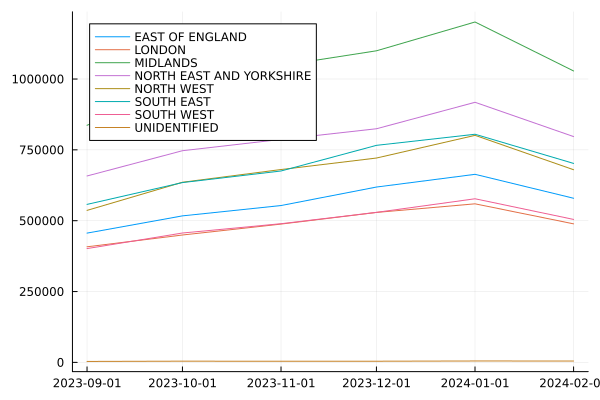

In [149]:
plt.plot(doxy_cap_grouped_region.date , doxy_cap_grouped_region.total_distributed, group=doxy_cap_grouped_region.REGIONAL_OFFICE_NAME,yformatter = :plain) 


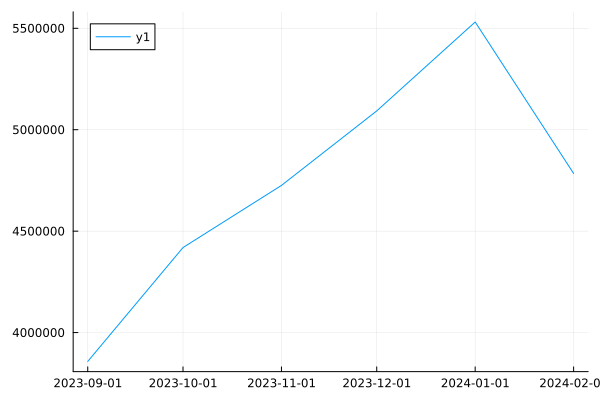

In [150]:
plt.plot(doxy_cap_grouped.date, doxy_cap_grouped.total_distributed, yformatter = :plain)